In [34]:
import torch
import grouping_util as gutil
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
torch .manual_seed(42)

# Graph construction

In [48]:
# Input point cloud

xyz = torch.rand(1, 3, 16)  # Batch of x clouds, y points each

In [52]:
distances, indices = gutil.knn_point(3, xyz, xyz)

In [53]:
indices.transpose(1,2)

tensor([[[ 0,  5,  1],
         [ 1,  5,  7],
         [ 2,  0,  9],
         [ 3,  7,  1],
         [ 4, 11,  6],
         [ 5,  1,  0],
         [ 6, 11,  4],
         [ 7,  3,  1],
         [ 8, 14, 13],
         [ 9,  0,  2],
         [10,  2, 12],
         [11,  4,  6],
         [12, 13,  4],
         [13, 12,  4],
         [14,  8,  6],
         [15,  3,  2]]])

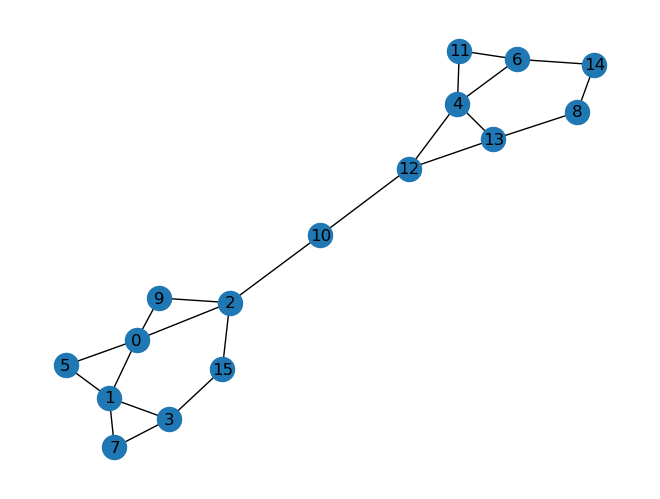

In [54]:
# Create graph and add edges

G = nx.Graph()
for row in indices.transpose(1,2)[0].numpy():
    G.add_edges_from((row[0], neighbor) for neighbor in row[1:])

# Draw and show
nx.draw(G, with_labels=True, pos=nx.spring_layout(G))
plt.show()

grouping utils used in Generator : group_point() - takes list of points and features and construct tensor: c, k, d (or it's transposed edition) group() - construct knn-graph and apply group_points()

In [56]:
fnet = torch.nn.Linear(3, 5)

In [67]:
with torch.no_grad():
    points = fnet(xyz.transpose(1, 2)).transpose(1, 2)

In [68]:
points

tensor([[[-0.1172, -0.1360, -0.1421, -0.1417, -0.2318, -0.1187, -0.1604,
          -0.1176, -0.0781, -0.0348, -0.2460, -0.2195, -0.3406, -0.2582,
          -0.0821, -0.2945],
         [-0.4560, -0.3489, -0.2580, -0.1691, -0.3250, -0.4424, -0.5034,
          -0.2714, -0.8928, -0.5223, -0.2390, -0.3244, -0.1707, -0.4467,
          -0.8790,  0.1106],
         [ 0.7556,  0.6368,  0.7715,  0.6091,  0.7344,  0.6713,  0.6773,
           0.6110,  1.0346,  0.7257,  0.9619,  0.7010,  0.8798,  0.9014,
           0.8691,  0.7055],
         [ 0.1886,  0.2304,  0.2429,  0.2444,  0.4309,  0.1928,  0.2797,
           0.1927,  0.0997,  0.0153,  0.4594,  0.4052,  0.6595,  0.4834,
           0.1097,  0.5671],
         [-0.3441, -0.3366, -0.5159, -0.4667, -0.3947, -0.2900, -0.2262,
          -0.3902, -0.2013, -0.2967, -0.6383, -0.3743, -0.5962, -0.4093,
          -0.0839, -0.7203]]])

In [69]:
points.shape, xyz.shape

(torch.Size([1, 5, 16]), torch.Size([1, 3, 16]))

In [ ]:
_, grouped_points, indices = gutil.group(xyz, points, 3) # (batch_size, num_dim, k, num_points)

In [91]:
from torch_geometric.nn import GCNConv

In [93]:
gconv0 = GCNConv(3, 1)

In [99]:
list(gconv0.parameters())

[Parameter containing:
 tensor([0.], requires_grad=True),
 Parameter containing:
 tensor([[-0.2455, -1.2184,  0.8197]], requires_grad=True)]

In [90]:
points.shape

torch.Size([1, 5, 16])

In [81]:
grouped_points = grouped_points.transpose(1, 2)

In [ ]:
conv0 = torch.nn.Conv2d(3, 1, kernel_size=1)

TypeError: Conv2d.__init__() missing 1 required positional argument: 'kernel_size'

In [82]:
grouped_points.shape

torch.Size([1, 3, 5, 16])

In [5]:
import torch.nn as nn
import torch

In [15]:
conv = nn.Conv2d(in_channels=3, out_channels=1, padding=2, stride=2, kernel_size=3)

In [16]:
image = torch.randn(3, 256, 256)

In [17]:
conv(image).shape

torch.Size([1, 129, 129])

In [15]:
import torch_geometric.nn as gnn
import torch
import numpy as np

In [59]:
gconv = gnn.dense.DenseGCNConv(6, 6)

In [64]:
ajacency_mtx = np.random.randint(0, 1, size=(1, 5, 5))


In [67]:
ajacency

tensor([[[0, 0, 0, 1, 1],
         [0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0],
         [1, 0, 1, 0, 0],
         [1, 0, 0, 1, 0]]], dtype=torch.int8)

In [61]:
features = torch.randn(1, 5, 6)

In [68]:
features

tensor([[[ 0.3472, -0.3940,  0.8473,  1.1469,  1.0469,  0.8228],
         [ 0.8423, -0.3876,  1.5731, -0.2384,  0.4641,  0.5347],
         [-1.5100, -0.0111,  1.2310, -0.0804, -0.0308, -0.2285],
         [-0.1675, -0.7007, -0.3719, -0.1570,  1.9107, -0.4385],
         [ 0.2738,  0.3092, -0.1651,  0.9117, -0.3428, -1.0543]]])

In [69]:
gconv(features, ajacency)

tensor([[[ 0.6604,  0.1901, -0.7556, -0.2632, -0.2282,  0.2111],
         [ 0.7460,  0.2876, -0.6776, -0.3292, -0.5847,  0.2612],
         [-0.5216, -0.0481, -1.2211, -0.2664,  0.5359, -0.5491],
         [ 0.2590,  0.3815, -1.2168, -0.5316, -0.0360, -0.0321],
         [ 0.6604,  0.1901, -0.7556, -0.2632, -0.2282,  0.2111]]],
       grad_fn=<AddBackward0>)

In [4]:
import torch
from grouping_util import knn_point

In [22]:
xyz = torch.randn(1, 32, 3)

In [23]:


def get_adjacency_matrix(idx):
    """
    Convert a knn indices tensor to an adjacency matrix.
    
    Args:
        idx: Tensor of shape (B, K, N) where B is batch size, K is the number of neighbors,
             and N is the number of points. Contains indices of the K nearest neighbors for each point.
    
    Returns:
        adj: Adjacency matrix of shape (B, N, N) where adj[b, i, j] = 1 if j is a neighbor of i in batch b.
    """
    B, K, N = idx.shape
    device = idx.device

    # Generate batch indices
    batch_indices = torch.arange(B, device=device).view(B, 1, 1).expand(B, K, N).reshape(-1)
    
    # Generate row indices (each point repeated K times)
    row_indices = torch.arange(N, device=device).view(1, 1, N).expand(B, K, N).reshape(-1)
    
    # Flatten the neighbor indices (columns)
    col_indices = idx.reshape(-1)
    
    # Initialize adjacency matrix and fill using index_put_
    adj = torch.zeros(B, N, N, dtype=torch.long, device=device)
    adj.index_put_((batch_indices, row_indices, col_indices), torch.ones_like(batch_indices, dtype=torch.long))
    
    return adj

# Example usage:


In [221]:
xyz = torch.randn(1, 3, 32)

In [226]:
_, idx = knn_point(8, xyz, xyz)
adj = get_adjacency_matrix(idx)

In [227]:
adj

tensor([[[1, 0, 0,  ..., 0, 0, 1],
         [0, 1, 0,  ..., 1, 0, 0],
         [0, 0, 1,  ..., 1, 0, 0],
         ...,
         [0, 1, 0,  ..., 1, 0, 0],
         [0, 0, 0,  ..., 0, 1, 1],
         [0, 0, 0,  ..., 0, 1, 1]]])

In [29]:
adj

tensor([[[1, 1, 0,  ..., 0, 0, 0],
         [1, 1, 0,  ..., 0, 0, 0],
         [1, 0, 1,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 1, 1, 0],
         [0, 0, 0,  ..., 0, 1, 0],
         [1, 1, 1,  ..., 0, 0, 1]]])

In [30]:
gconv = gnn.dense.DenseGCNConv(3, 6)

In [32]:
gconv(xyz, adj).shape

torch.Size([1, 32, 6])

In [228]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.nn as gnn
import grouping_util as gutil

def init_weight_(m):
    if type(m) == nn.Conv2d:
        torch.nn.init.xavier_uniform_(m.weight)


class ResGraphConvUnpool(nn.Module):
    def __init__(self, k=8, in_dim=128, dim=128):
        super(ResGraphConvUnpool, self).__init__()
        self.k = k
        self.alpha = k / (k+1)
        self.num_blocks = 12

        self.bn_relu_layers = nn.ModuleList()
        for i in range(self.num_blocks):
            self.bn_relu_layers.append(nn.ReLU())

        self.conv_layers = nn.ModuleList()
        for i in range(self.num_blocks):
            # self.conv_layers.append(gnn.dense.DenseGCNConv(in_dim, dim,bias=False))
            self.conv_layers.append(nn.Linear(in_dim, dim, bias=False))
            self.conv_layers.append(gnn.dense.DenseGCNConv(in_dim, dim, bias=False))
            # self.conv_layers.append(nn.Conv2d(dim, dim, 1, 1,bias=False))

        self.unpool_center_conv = nn.Linear(dim, 6, bias=False)
        self.unpool_neighbor_conv = gnn.dense.DenseGCNConv(dim, 6, bias=False)

        self.conv_layers.apply(init_weight_)
        self.unpool_center_conv.apply(init_weight_)
        self.unpool_neighbor_conv.apply(init_weight_)

    def forward(self, xyz, points):
        # xyz: (batch_size, num_dim(3), num_points)
        # points: (batch_size, num_dim(128), num_points)

        indices = None
        for idx in range(self.num_blocks): # 4 layers per iter
            shortcut = points # (batch_size, num_dim(128), num_points)

            points = self.bn_relu_layers[idx](points) # ReLU
            b, _, _ = points.shape

            if idx == 0 and indices is None:
                # _, grouped_points, indices = gutil.group(xyz, points, self.k) # (batch_size, num_dim, k, num_points)
                _, indices = gutil.knn_point(self.k, xyz, xyz)
                aj_mat = get_adjacency_matrix(indices[:,1:])
            
                print(aj_mat.shape)
                
            center_points = self.conv_layers[2 * idx](points.transpose(1, 2)).transpose(1, 2)  # (batch_size, num_dim(128), 1, num_points)
            grouped_points_nn = self.conv_layers[2 * idx + 1](shortcut.transpose(1, 2), aj_mat).transpose(1, 2)

            # print(f'group {grouped_points_nn.mean()} center {center_points.mean()}')
            points = (1 - self.alpha) * grouped_points_nn + self.alpha * center_points + shortcut 

            if idx == self.num_blocks-1:
                num_points = xyz.shape[-1]
                # Center Conv

                points_xyz = self.unpool_center_conv(points.transpose(1, 2)).transpose(1, 2) # (batch_size, 3*up_ratio, 1, num_points)
                grouped_points_xyz = self.unpool_neighbor_conv(points.transpose(1, 2), aj_mat).transpose(1, 2) # (batch_size, 3*up_ratio, k, num_points)

                # CNN
                new_xyz = (1 - self.alpha) * points_xyz  + self.alpha * grouped_points_xyz # (batch_size, 3*up_ratio, num_points)
                # print(new_xyz.shape)
                new_xyz = new_xyz.reshape(b, 3, 2, num_points) # (batch_size, 3, up_ratio, num_points)

                b, d, n = xyz.shape
                # print(new_xyz.shape)
                # print(xyz.view(b, d, 1, n).repeat(1, 1, 2, 1).shape)
                new_xyz = new_xyz + xyz.view(b, d, 1, n).repeat(1, 1, 2, 1) # add delta x to original xyz to upsample
                new_xyz = new_xyz.reshape(b, 3, 2*n)

                return new_xyz, points


In [234]:
resconv = ResGraphConvUnpool(k=5, dim=16, in_dim=16)

In [237]:
xyz = torch.randn(1, 3, 32)
features = torch.randn(1, 16, 32)

In [238]:
resconv(xyz, features)[0].shape

torch.Size([1, 32, 32])


torch.Size([1, 3, 64])